In [1]:
from train import bgs 
import h5py 
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [2]:
[dataset] = qml.data.load("other", name="bars-and-stripes") 
inputs = dataset.train['4']['inputs'] # images de pixels 4x4 
    
# Dimensions des inputs: (N, D) 
inputs_np = np.array(inputs)
nb_samples = inputs_np.shape[0] # N ---> samples
nb_pixels  = inputs_np.shape[1] # D ---> features

Nv = 16
Nh = 3

In [3]:
nb_samples

1000

In [4]:
with h5py.File("rbm_parameters.h5", "r") as f:
    print(f.keys()) 

    w     = np.array(f['weight_matrix'])
    eta   = np.array(f['eta_vector'])    
    theta = np.array(f['theta_vector'])
    llh   = np.array(f['log_likelihoods'])

    print(w)
    print(eta)
    print(theta)
    print(llh)

<KeysViewHDF5 ['weight_matrix', 'eta_vector', 'theta_vector', 'log_likelihoods']>
[[-0.86915835 -0.87099213 -0.86762286]
 [-0.90924276 -0.9058533  -0.91106084]
 [-0.88623118 -0.88676777 -0.88842564]
 [-0.84541001 -0.84669724 -0.84676099]
 [-0.81977599 -0.82094284 -0.82236233]
 [-0.81958778 -0.82352653 -0.82118987]
 [-0.82521791 -0.83063323 -0.82592671]
 [-0.79463462 -0.7965556  -0.79347977]
 [-0.79248998 -0.797851   -0.79301259]
 [-0.82832834 -0.83273486 -0.82766675]
 [-0.80102039 -0.81007649 -0.80307666]
 [-0.76475939 -0.76130719 -0.76547366]
 [-0.86011353 -0.86281211 -0.8641215 ]
 [-0.85561548 -0.85666856 -0.85441352]
 [-0.85865779 -0.86526314 -0.85976197]
 [-0.85441374 -0.85135303 -0.85064907]]
[-0.04351652 -0.04744186 -0.04196189]
[-0.95067387 -0.89263565 -0.96585269 -0.89271923 -0.94000589 -0.87036944
 -0.93037304 -0.85307325 -0.85950309 -0.86465866 -0.84123007 -0.81825482
 -0.93684238 -0.86684353 -0.88388309 -0.8794785 ]
[1.67338629e-06 1.46352169e-06 1.27235382e-06 1.09837338e-0

In [5]:
sample_v = np.array([bgs(w, eta, theta, Nv, Nh, 10)[1] for i in range(nb_samples)])

sample_v[0 : 3]

array([[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

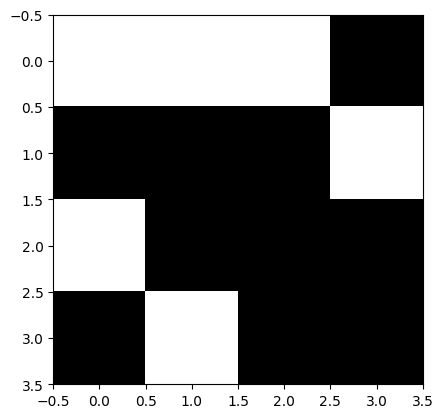

In [6]:
plt.imshow(sample_v[0].reshape(4, 4), cmap='gray')

In [7]:
def plot_image(
    sample, shape=(28, 28), grid_size=(10, 10), show_grid=False, randomize=True
):
    """Args:
    sample
    shape: (Default value = (28)
    28)
    grid_size: (Default value = (10)
    10)
    show_grid: (Default value = False)
    randomize: (Default value = True)
    """
    num_samples = grid_size[0] * grid_size[1]
    if randomize:
        id_sample = np.random.randint(0, sample.shape[0], num_samples)
    else:
        id_sample = np.arange(num_samples)

    # Create a display array with the appropriate size
    display = np.zeros((shape[0] * grid_size[0], shape[1] * grid_size[1]))

    for i, id_s in enumerate(id_sample):
        # Calculate the row and column for the grid
        idx = i // grid_size[1]  # Row index
        idy = i % grid_size[1]  # Column index

        # Ensure the sample can be reshaped to the specified shape
        display[
            (idx * shape[0]) : ((idx + 1) * shape[0]),
            (idy * shape[1]) : ((idy + 1) * shape[1]),
        ] = sample[id_s].reshape(
            shape
        )  # Directly reshape to shape

    # Plot the display image
    fig, ax = plt.subplots(1, 1)
    ax.imshow(display, cmap="gray")
    ax.axis("off")  # Hide axes

    if show_grid:
        # Minor ticks for the grid
        ax.set_xticks(np.arange(-0.5, grid_size[1] * shape[1], shape[1]), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_size[0] * shape[0], shape[0]), minor=True)

        # Gridlines based on minor ticks
        ax.grid(which="minor", color="gray", linestyle="-", linewidth=2)

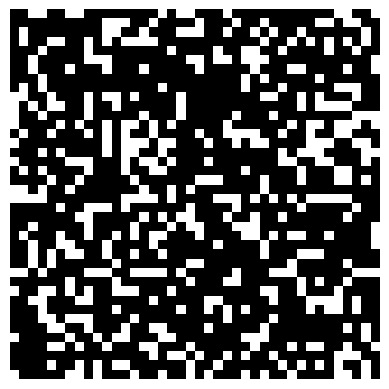

In [8]:
plot_image(sample=sample_v, shape=(4, 4), grid_size=(10, 10), show_grid=True)

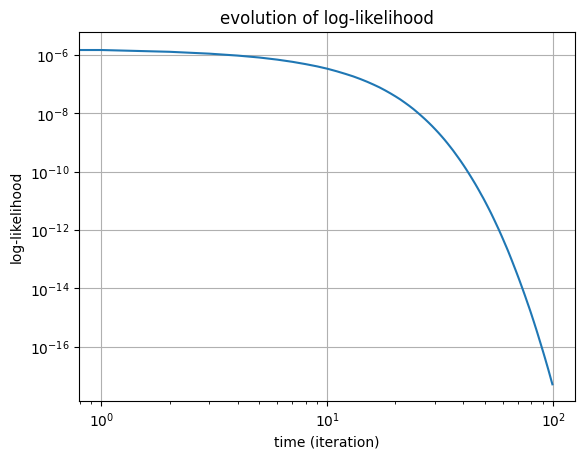

In [9]:
plt.plot(llh)
plt.xlabel("time (iteration)")
plt.ylabel("log-likelihood")
plt.title("evolution of log-likelihood")
plt.loglog()
plt.grid(True)